In [42]:
import pandas as pd 
import seaborn as sb 
import numpy as np 
import matplotlib.pyplot as plt 
import requests
%matplotlib inline

In [43]:
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")

Datos obtenidos exitosamente


In [44]:
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

In [45]:
# Convertir la lista de diccionarios a DataFrame
lesionados_data = pd.DataFrame(rows)
lesionados_data.head(5)

,OBJECTID,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CODIGO_VEHICULO,CONDICION,GENERO,EDAD,CONDICION_A
0,1681468,12905655,A001677559,1725253200000,23:05:00,2024.0,SEPTIEMBRE,LUNES,1725336300000,CL 6 - KR 27 02,CHOQUE,LOS MARTIRES,2.0,MOTOCICLISTA,MASCULINO,33.0,MOTOCICLISTA
1,1681469,12905658,A001677559,1725253200000,23:05:00,2024.0,SEPTIEMBRE,LUNES,1725336300000,CL 6 - KR 27 02,CHOQUE,LOS MARTIRES,2.0,PASAJERO,MASCULINO,33.0,MOTOCICLISTA
2,1697696,12907702,A001678224,1727067600000,07:50:00,2024.0,SEPTIEMBRE,LUNES,1727095800000,KR 3 E- CL 22 BIS S 02,ATROPELLO,SAN CRISTOBAL,NaN,PEATON,FEMENINO,67.0,PEATON
3,98139,24887,833879800,1201755600000,09:30:00,2008.0,ENERO,JUEVES,1201789800000,KR 97-18 2,VOLCAMIENTO,FONTIBON,1.0,MOTOCICLISTA,MASCULINO,43.0,MOTOCICLISTA
4,1225208,2315877,A1247721,1362546000000,15:45:00,2013.0,MARZO,MIERCOLES,1362602700000,KR 88D-CL36 S 02,CHOQUE,KENNEDY,2.0,CONDUCTOR,MASCULINO,14.0,CONDUCTOR


In [46]:
lesionados_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              2000 non-null   int64  
 1   CODIGO_ACCIDENTADO    2000 non-null   object 
 2   FORMULARIO            2000 non-null   object 
 3   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 4   HORA_OCURRENCIA_ACC   2000 non-null   object 
 5   ANO_OCURRENCIA_ACC    2000 non-null   float64
 6   MES_OCURRENCIA_ACC    2000 non-null   object 
 7   DIA_OCURRENCIA_ACC    2000 non-null   object 
 8   FECHA_HORA_ACC        2000 non-null   int64  
 9   DIRECCION             2000 non-null   object 
 10  CLASE_ACC             2000 non-null   object 
 11  LOCALIDAD             2000 non-null   object 
 12  CODIGO_VEHICULO       1630 non-null   float64
 13  CONDICION             2000 non-null   object 
 14  GENERO                1991 non-null   object 
 15  EDAD                 

In [47]:
lesionados_data.isna().sum()

OBJECTID                  0
CODIGO_ACCIDENTADO        0
FORMULARIO                0
FECHA_OCURRENCIA_ACC      0
HORA_OCURRENCIA_ACC       0
ANO_OCURRENCIA_ACC        0
MES_OCURRENCIA_ACC        0
DIA_OCURRENCIA_ACC        0
FECHA_HORA_ACC            0
DIRECCION                 0
CLASE_ACC                 0
LOCALIDAD                 0
CODIGO_VEHICULO         370
CONDICION                 0
GENERO                    9
EDAD                     11
CONDICION_A               0
dtype: int64

In [48]:
# Reemplazar cadenas vacías o espacios con NaN
lesionados_data.replace(["", "SIN INFORMACION"," ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
lesionados_data.dropna(inplace=True)

In [49]:
lesionados_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              1625 non-null   int64  
 1   CODIGO_ACCIDENTADO    1625 non-null   object 
 2   FORMULARIO            1625 non-null   object 
 3   FECHA_OCURRENCIA_ACC  1625 non-null   int64  
 4   HORA_OCURRENCIA_ACC   1625 non-null   object 
 5   ANO_OCURRENCIA_ACC    1625 non-null   float64
 6   MES_OCURRENCIA_ACC    1625 non-null   object 
 7   DIA_OCURRENCIA_ACC    1625 non-null   object 
 8   FECHA_HORA_ACC        1625 non-null   int64  
 9   DIRECCION             1625 non-null   object 
 10  CLASE_ACC             1625 non-null   object 
 11  LOCALIDAD             1625 non-null   object 
 12  CODIGO_VEHICULO       1625 non-null   float64
 13  CONDICION             1625 non-null   object 
 14  GENERO                1625 non-null   object 
 15  EDAD                  1625

In [50]:
lesionados_data["CLASE_ACC"].value_counts()

CLASE_ACC
CHOQUE               1326
ATROPELLO             142
CAIDA DE OCUPANTE      88
VOLCAMIENTO            40
OTRO                   25
AUTOLESION              4
Name: count, dtype: int64

In [51]:
lesionados_data["CONDICION"].value_counts()

CONDICION
MOTOCICLISTA    706
PASAJERO        513
CONDUCTOR       229
CICLISTA        177
Name: count, dtype: int64

In [52]:
lesionados_data["GENERO"].value_counts() 
# Eliminamos aquellos campos que no contenian información del genero
# para asi poder trabajr con dummy variables

GENERO
MASCULINO    1137
FEMENINO      488
Name: count, dtype: int64

In [53]:
dummies_genero = pd.get_dummies(lesionados_data["GENERO"],dtype=int)
dummies_genero

,FEMENINO,MASCULINO
0,0,1
1,0,1
3,0,1
4,0,1
5,1,0
...,...,...
1994,0,1
1995,0,1
1996,1,0
1998,0,1


In [54]:
lesionados_data = lesionados_data.join(dummies_genero)
lesionados_data.drop("GENERO", axis=1, inplace=True)

In [55]:
lesionados_data.drop("MASCULINO", axis=1, inplace=True)
lesionados_data.rename(columns={"FEMENINO": "GENERO"}, inplace=True)

In [56]:
lesionados_data.drop("OBJECTID", axis=1, inplace=True)
lesionados_data.head(5)
# Actualizamos la tabla con la columna de genero donde 1 es femenino y 0 masculino

,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CODIGO_VEHICULO,CONDICION,EDAD,CONDICION_A,GENERO
0,12905655,A001677559,1725253200000,23:05:00,2024.0,SEPTIEMBRE,LUNES,1725336300000,CL 6 - KR 27 02,CHOQUE,LOS MARTIRES,2.0,MOTOCICLISTA,33.0,MOTOCICLISTA,0
1,12905658,A001677559,1725253200000,23:05:00,2024.0,SEPTIEMBRE,LUNES,1725336300000,CL 6 - KR 27 02,CHOQUE,LOS MARTIRES,2.0,PASAJERO,33.0,MOTOCICLISTA,0
3,24887,833879800,1201755600000,09:30:00,2008.0,ENERO,JUEVES,1201789800000,KR 97-18 2,VOLCAMIENTO,FONTIBON,1.0,MOTOCICLISTA,43.0,MOTOCICLISTA,0
4,2315877,A1247721,1362546000000,15:45:00,2013.0,MARZO,MIERCOLES,1362602700000,KR 88D-CL36 S 02,CHOQUE,KENNEDY,2.0,CONDUCTOR,14.0,CONDUCTOR,0
5,829263,840068900,1213851600000,07:50:00,2008.0,JUNIO,JUEVES,1213879800000,CL 2C-60 02,CHOQUE,PUENTE ARANDA,1.0,PASAJERO,44.0,PASAJERO,1


array([[<Axes: title={'center': 'FECHA_OCURRENCIA_ACC'}>,
        <Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>],
       [<Axes: title={'center': 'FECHA_HORA_ACC'}>,
        <Axes: title={'center': 'CODIGO_VEHICULO'}>],
       [<Axes: title={'center': 'EDAD'}>,
        <Axes: title={'center': 'GENERO'}>]], dtype=object)

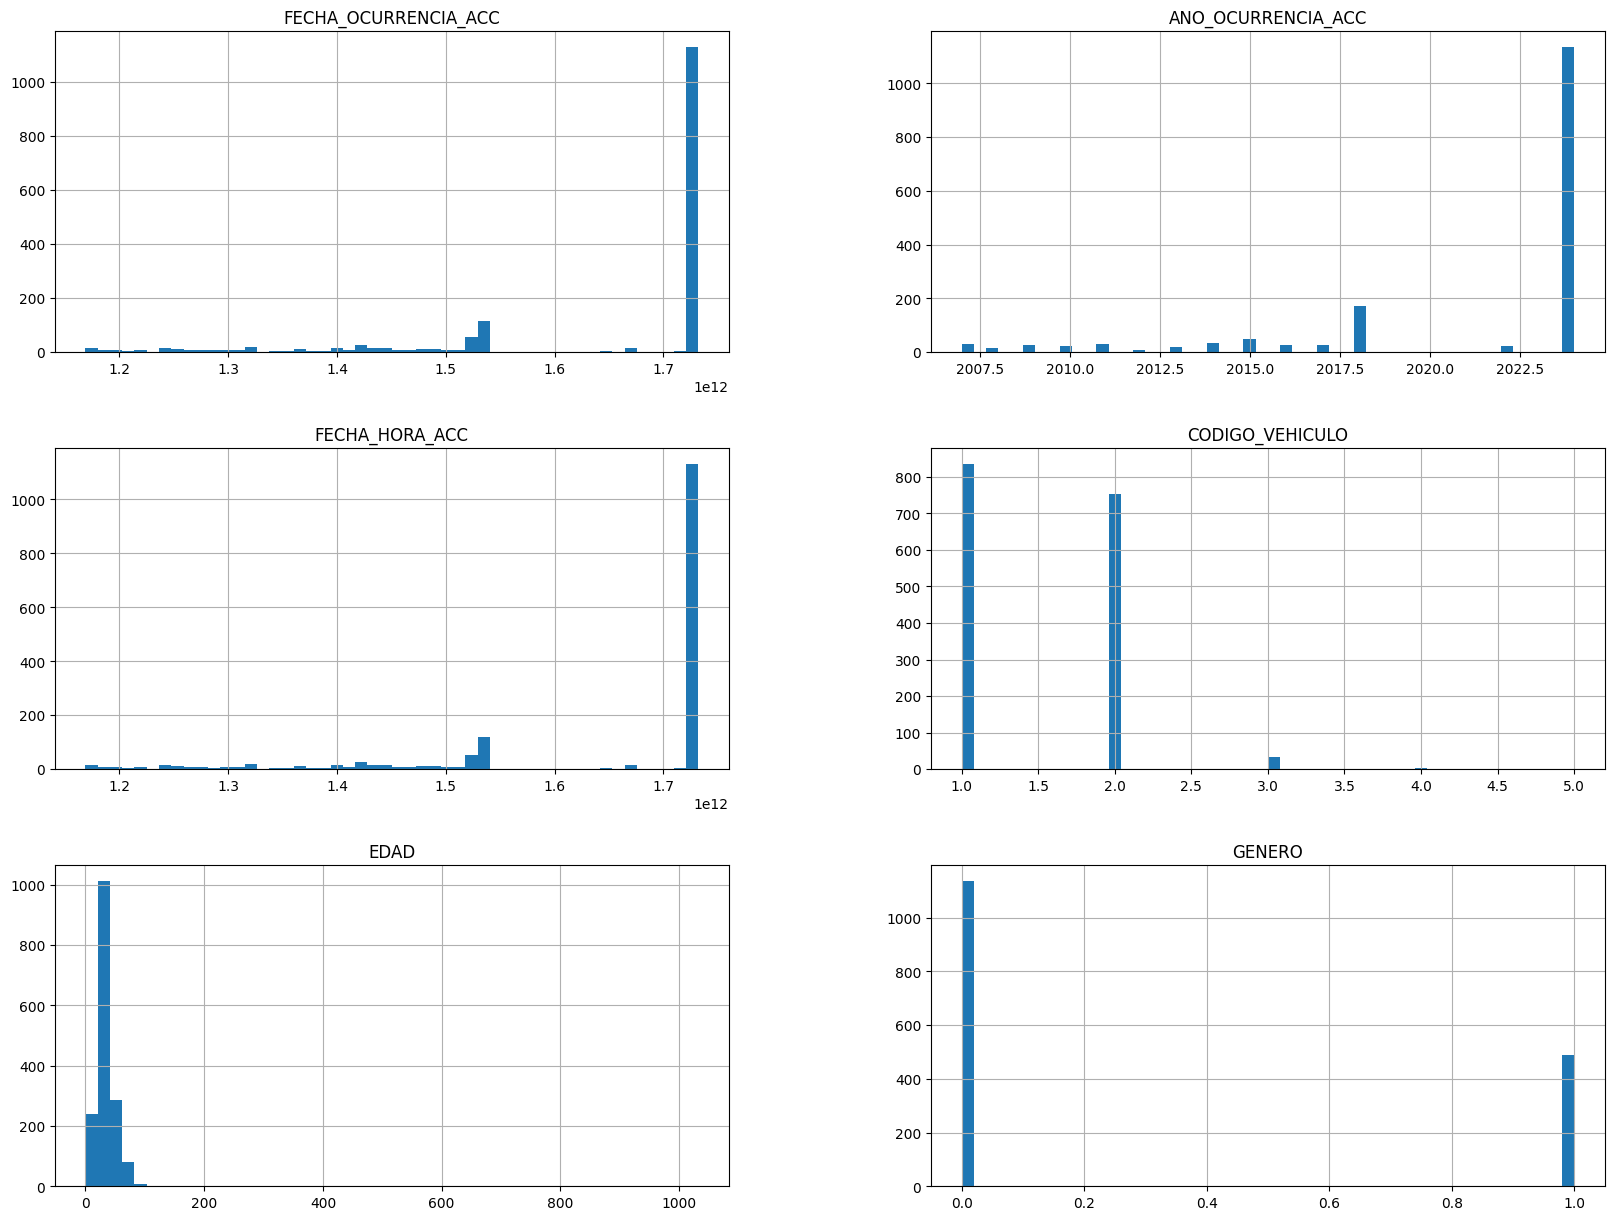

In [57]:
lesionados_data.hist(bins=50, figsize=(20,15)) #Plots a histogram of the numerical attributes
# Importante. Graficar aquellos que tienen sentido análizar en un histograma